In [1]:
import numpy as np
import sys
from os.path import join
sys.path.append('../fluidity-master/python/')
import vtktools
sys.path.append('../data/')
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
data_path = "../data/small3DLSBU/"

In [3]:
def load_data(ts_0,ts_end):
    data_dict = {}
    for ts in range(ts_0,ts_end+1):
        try:
            data_dict[ts] = vtktools.vtu(join(data_path,'LSBU_'+ str(ts)+'.vtu'))
        except:
            print('Can\'t open the file \'' + str(join(data_path,'LSBU_'+ str(ts)+'.vtu'))+ '\'')
    return data_dict
    
    

In [17]:
loaded =load_data(100,104)


Can't open the file '../data/small3DLSBU/LSBU_104.vtu'


In [18]:
field_names = loaded[101].GetFieldNames()
field_names

['Pressure', 'Tracer', 'TracerBackground', 'Time', 'Velocity']

In [19]:
loaded[101].GetLocations().size

300120

In [20]:
loaded[101].GetField('Pressure')

array([[-22.62276032],
       [ -0.26894328],
       [ -0.23678956],
       ...,
       [-19.99852411],
       [-18.42972959],
       [-18.22327278]])

In [21]:
def spatial_covariance(vtk_file, field):
    field_data = vtk_file.GetField(field)
    

In [22]:
cov = spatial_covariance(loaded[101], 'Tracer')


In [23]:
field_data = loaded[101].GetField('Pressure')
cov_test = np.cov(field_data)

/home/aml718/anaconda3/envs/project/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Degrees of freedom <= 0 for slice
  
/home/aml718/anaconda3/envs/project/lib/python3.6/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/home/aml718/anaconda3/envs/project/lib/python3.6/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [10]:
loaded.clear()

In [11]:
loaded

{}

In [59]:
cropped = loaded[101].Crop(min_x= -50, max_x= 50,
                           min_y= -50, max_y= 50,
                           min_z=0, max_z=50
                          )

In [60]:
loaded[101].GetLocations().size

77373

In [31]:
cov = np.cov(loaded[101].GetField('Pressure'))

/home/aml718/anaconda3/envs/project/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Degrees of freedom <= 0 for slice
  """Entry point for launching an IPython kernel.


In [61]:
cov.size

668274201

In [9]:
loaded[101].GetLocations()[0]

array([-359.68463275, -338.12365033,  250.        ])

In [10]:
loaded[101].GetPointPoints(0)

array([    0,   993,  4643,   676,   421, 89081,  1754,   475])

In [11]:
loaded[101].GetLocations()[165]

array([-60.74654952,  -9.51176862,   0.2       ])

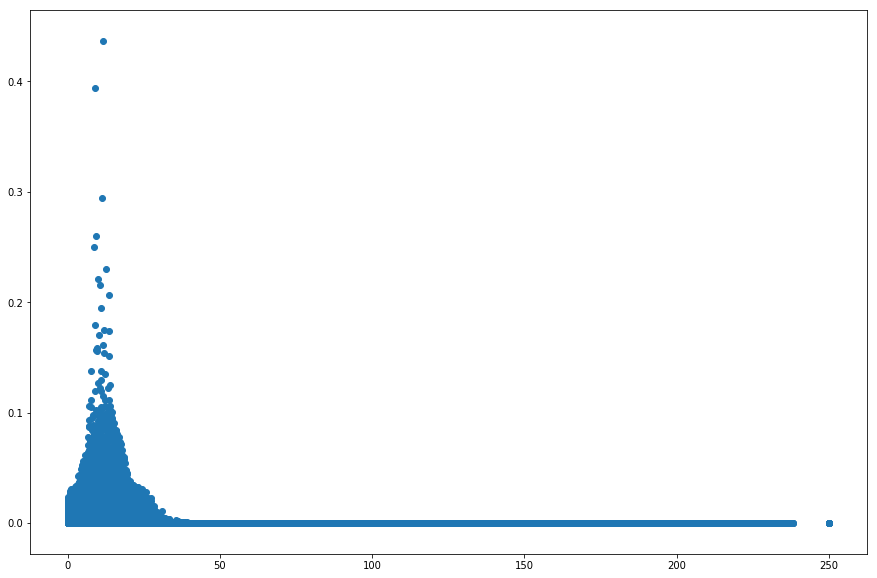

In [24]:
plt.figure(figsize=(15,10))
plt.scatter(loaded[101].GetLocations()[:,2],loaded[101].GetField('Tracer'))

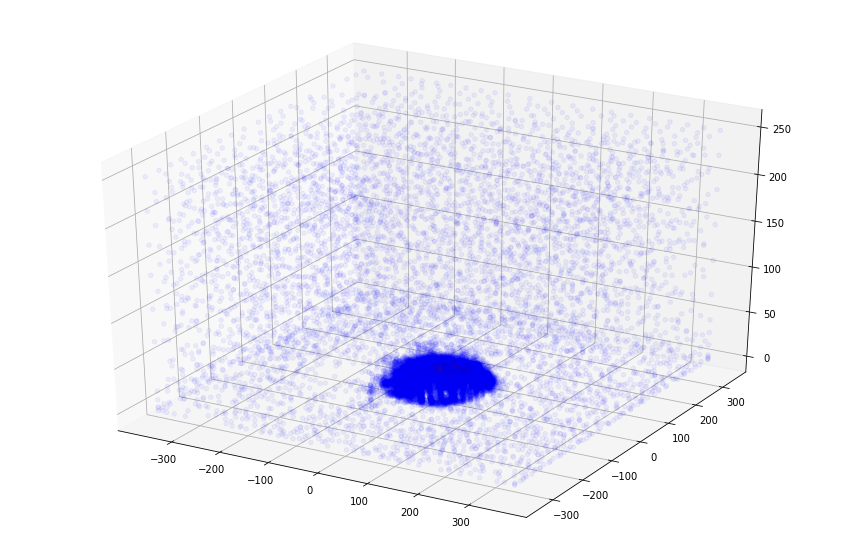

In [25]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
positions = loaded[101].GetLocations()[0:20000,:]
field = loaded[101].GetField('Tracer')[0:20000,:]
color = ['r' if i > 0.05  else 'b' for i in field  ]

ax.scatter(positions[:,0],positions[:,1],positions[:,2],c= color,alpha=0.05)

In [26]:
np.cov(field)

/home/aml718/anaconda3/envs/project/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Degrees of freedom <= 0 for slice
  """Entry point for launching an IPython kernel.


array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [27]:
np.max(cov)

In [28]:
cov = np.inner ((field - field.mean()),field - field.mean())/(field.size - 1 )


In [ ]:
sns.heatmap(cov)

In [148]:
x = [-2.1, -1,  4.3]
y = [3,  1.1,  0.12]
X = np.stack((x, y), axis=0)

print(np.cov(y, x))



[[ 2.14413333 -4.286     ]
 [-4.286      11.71      ]]
